In [1]:
RESULT_DIR = "../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
# RESULT_DIR = "/home/niko/Downloads/results"

In [2]:
import os
import sys
sys.path.append("..")

from src.eval.SampleResult import SampleResult

In [3]:
files = os.listdir(RESULT_DIR)
files = [f for f in files if f.endswith("final.json")]

# get ids from the first part of the filename separated by "_"
file_ids = [f.split("_")[0] for f in files]

samples = [SampleResult.load_by_id(RESULT_DIR, file_id) for file_id in file_ids]

In [4]:
for sample in samples:
    sample.build_alignments(normalize_words=False)

In [5]:
import numpy as np
from src.eval.metrics.word_first_correct import word_first_correct_response

wfc = [[word_first_correct_response(s.final, s.partials, i, s.alignments) for i in range(len(s.final))] for s in samples]

In [6]:
total_wfc = np.concat(wfc)
wfc_latency = np.array([r["latency"] for r in total_wfc if r is not None])
wfc_latency.shape

(41535,)

In [9]:
print("Min:", np.min(wfc_latency))
print("Max:", np.max(wfc_latency))
print("Mean:", np.mean(wfc_latency))
print("Median:", np.median(wfc_latency))
print("Std:", np.std(wfc_latency))
print("P95:", np.percentile(wfc_latency, 95))
print("P99:", np.percentile(wfc_latency, 99))

Min: -122.8367733088881
Max: 122.38507622674108
Mean: 1.8170361124198826
Median: 2.0306219151616105
Std: 8.49053502799428
P95: 4.851589579343794
P99: 8.345969580778451


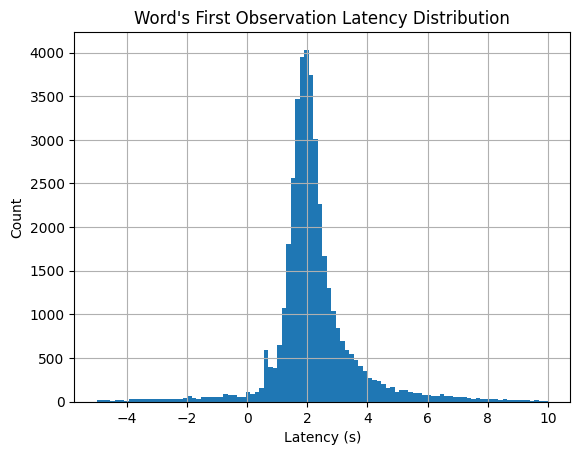

In [7]:
import matplotlib.pyplot as plt

plt.hist(wfc_latency, bins=100, range=(-5, 10))
plt.xlabel("Latency (s)")
plt.ylabel("Count")
plt.title("Word's First Observation Latency Distribution")
plt.grid()